<a href="https://colab.research.google.com/github/salsaagz/OSMnx-python-for-street-network/blob/main/scripts/extract-visualize-correct-save-analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Install OSMNX**

In [ ]:
!pip install osmnx
import osmnx as ox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 1.0 MB/s eta 0:00:00


## **1. Get administrative place boundaries and shapefiles**

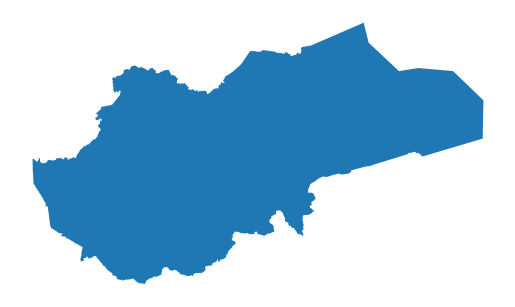

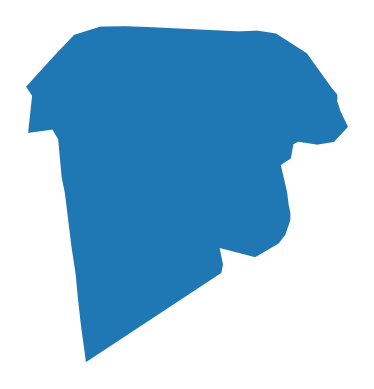

In [ ]:
import osmnx as ox
Provinsi = ox.geocode_to_gdf('Jambi, Indonesia')
Kota = ox.geocode_to_gdf('Sungai Penuh, Jambi')
# Kecamatan = ox.geocode_to_gdf('Pondok Tinggi, Sungai Penuh') Tidak bisa dilakukan untuk level kecamatan
ax = ox.project_gdf(Provinsi).plot()
bx = ox.project_gdf(Kota).plot()
_ = ax.axis('off')
_ = bx.axis('off')

**Get multiple places boundaries in single query**

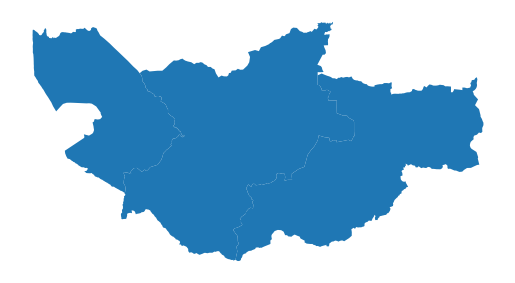

In [ ]:
places = ox.geocode_to_gdf(['Sarolangun', 'Merangin', 'Kerinci'])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

## **2. Download and model street networks**

**2a) street network from bounding box**

In [ ]:
G = ox.graph_from_bbox(-1.609972, 345067.67, 103.607254, 9821996.34, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

RuntimeError: ignored

**2b) street network from lat-long point**

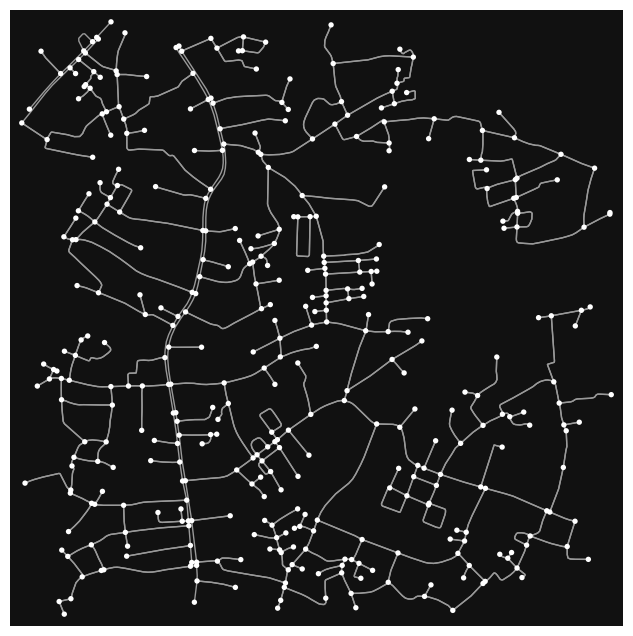

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_point((-1.609972, 103.607254), dist=750, network_type='all')
ox.plot_graph(G)

**2c) street network from address**

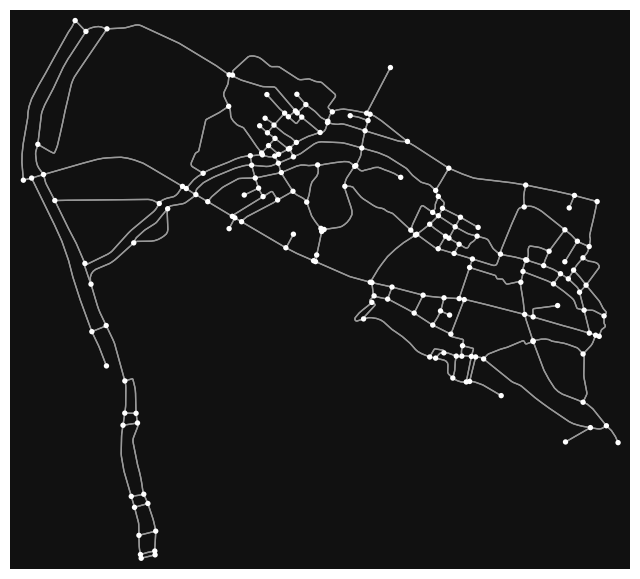

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_address('Jalan Stadion Pancasila , Sungai Penuh, Jambi', network_type='drive')
ox.plot_graph(G)

**2d) street network from polygon**

In [ ]:
G = ox.graph_from_polygon(mission_shape, network_type='drive')
ox.plot_graph(G)

**2e) street network from place name**

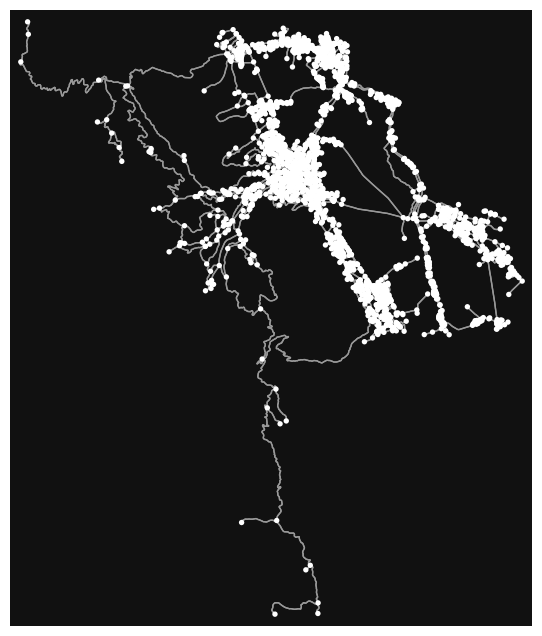

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Sungai Penuh, Jambi', network_type='walk')
ox.plot_graph(G)

**2f) multiple strret within a borough, county, state, or other geographic entity**

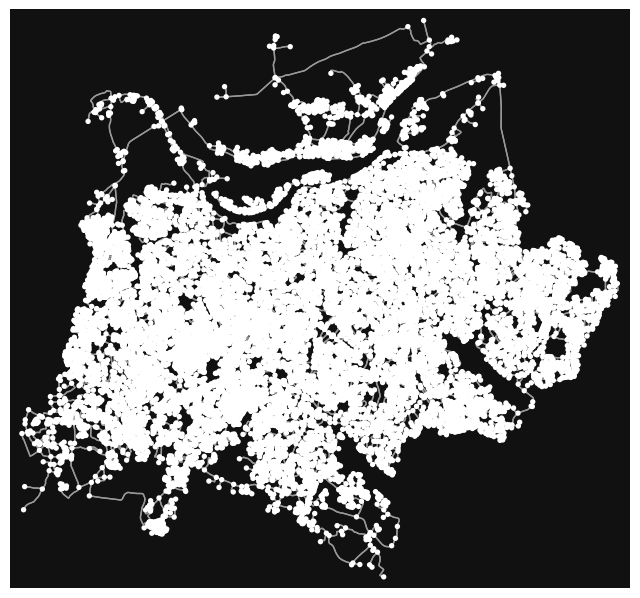

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
places = ['Jambi, Jambi, Indonesia',
          'Sarolangun, Jambi']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

**2g) street networks from all around the world**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 4.0 MB/s eta 0:00:00


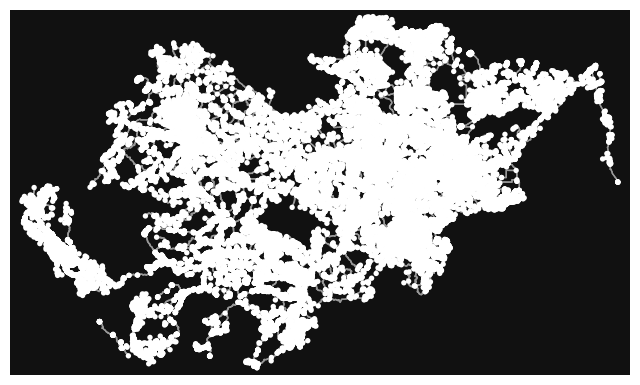

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_place('Jambi, Indonesia')
ox.plot_graph(G)

## **3. Correct and simplify network topology**

Penyederhanaan dilakukan oleh OSMnx secara otomatis, namun kita dapat menguraikannya untuk melihat cara kerjanya\
Node OpenStreetMap bisa jadi aneh: node tersebut mencakup persimpangan, namun node tersebut juga mencakup semua titik di sepanjang segmen jalan di mana jalan tersebut berkelok yang sebenarnya bukanlah node dalam pengertian teori grafik, jadi perlu dihapus secara algoritmik dan mengkonsolidasikan kumpulan tepian antara node jaringan yang “sebenarnya” menjadi satu tepian.

## **4. Save street networks to disk**

In [ ]:
place = ['Sungai Penuh, Jambi']
east_bay = ox.geocode_to_gdf(place)
east_bay.to_file('/content/drive/MyDrive/Skripsi/OSMnx/SungaiPenuh')

<ipython-input-20-4fd2edbeb744>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  east_bay.to_file('/content/drive/MyDrive/Skripsi/OSMnx/SungaiPenuh')


In [ ]:
places = ['Sungai Penuh, Jambi']
G = ox.graph.graph_from_place(places, network_type='walk')
#ox.plot_graph(G)
#shp1 = ox.graph_to_gdfs(G)
ox.io.save_graph_shapefile(G, filepath='/content/drive/MyDrive/Skripsi/OSMnx/shp1', encoding='utf-8', directed=False)
#shp1.to_file('/content/drive/MyDrive/Skripsi/OSMnx/shp1')

<ipython-input-34-349e376c3df3>:5: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  ox.io.save_graph_shapefile(G, filepath='/content/drive/MyDrive/Skripsi/OSMnx/shp1', encoding='utf-8', directed=False)
/usr/local/lib/python3.10/dist-packages/osmnx/io.py:117: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [ ]:
places = ['Sungai Penuh, Jambi']
G = ox.graph_from_place(places, network_type='walk')

## **5. Analyze street networks**

In [ ]:
G = ox.graph_from_place('Santa Monica, California', network_type='walk')
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])
extended_stats = ox.extended_stats(G, bc=True)
print(extended_stats['betweenness_centrality_avg'])

In [ ]:
G = ox.graph_from_place('Piedmont, CA, USA', network_type='drive')
route = nx.shortest_path(G, orig, dest)
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')